In [3]:
import numpy as np
from scipy.optimize import LinearConstraint
from scipy.optimize import NonlinearConstraint
from scipy.optimize import Bounds
from scipy.optimize import linprog

In [67]:
def Kelley(c,K,K_gradients,A,b,bounds,e):
   
    counter = 0
    lp = linprog(c=c, A_ub = A, b_ub = b, method = 'simplex',bounds=bounds)
    xk = lp.x
    g = np.zeros(len(K))
    path = [xk]
    for i in range(len(K)):
        g[i] = K[i](xk)
    l = np.argmax(g)
    
    while g[l] > e:
        counter += 1
        #if counter % 300 == 0:
           # print(A.shape)
        grad_xk = K_gradients[l](xk)
        add_A = grad_xk.T
        add_b = grad_xk.T@xk - g[l]
        if A is not None:
            m,n = A.shape
        else:
            m = 0
            n = c.shape[0]
        new_A = np.zeros((m+1,n))
        new_A[:m,:] = A
        new_A[m,:] = add_A
        new_b = np.zeros(m+1)
        new_b[:m] = b
        new_b[m] = add_b
        A = new_A
        b = new_b
        
        lp = linprog(c=c, A_ub = A, b_ub = b, method = 'simplex',bounds=bounds)
        xk = lp.x
        path.append(xk)
        for i in range(len(K)):
            g[i] = K[i](xk)
        l = np.argmax(g)
        
    return xk, counter, A, b, np.array(path)
        

In [40]:
def plotter(X,Y,fun):
    m,n = X.shape
    res = np.zeros([m,n])
    for i in range(m):
        for j in range(n):
            res[i,j] = fun(np.array([X[i,j],Y[i,j]]))
    return res

In [122]:
#Test
c_test = np.array([0,1])

def g1(x):
    return x[0]**2 + x[1]**2 -1

def g2(x):
    return np.exp(x[0]) - x[1]

K_test = [g1,g2]

def grad_g1(x):
    return np.array([2*x[0], 2*x[1]])

def grad_g2(x):
    return np.array([np.exp(x[0]),-1])

K_grad_test = [grad_g1, grad_g2]

A_test = np.array([[1,0],[1,-1]])

b_test = np.array([-0.5,0])

eps = 1e-3



bound_test = ([-1,1],[-1,1])

res = Kelley(c_test,K_test,K_grad_test,A_test, b_test,bound_test,eps)

x_opt = res[0]

print('x = ', res[0])
print('Numter of Iterations: ', res[1])

A = res[2]
b = res[3]

path_x = res[4][:,0]
path_y = res[4][:,1]


constraints = []

def make_constraint(i):
    
    def constraint(x):
        return A[i,:] @ x - b[i]
    return constraint

for i in range(b.shape[0]):
    constraint = make_constraint(i)
    
    constraints.append(constraint)



x =  [-0.916587    0.39988142]
Numter of Iterations:  4


In [60]:
import matplotlib.pyplot as plt

<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

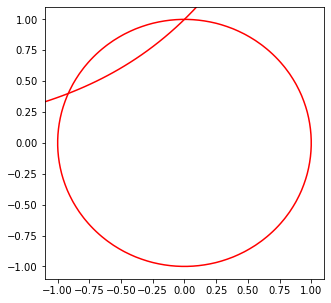

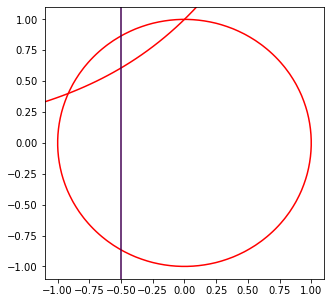

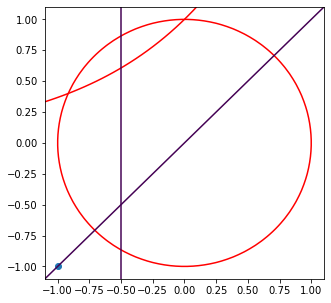

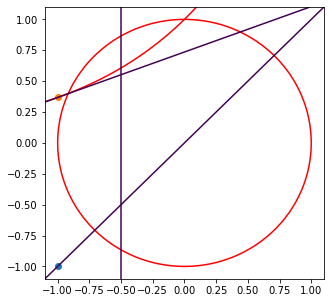

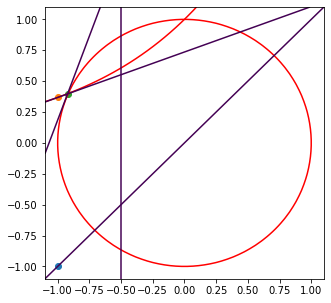

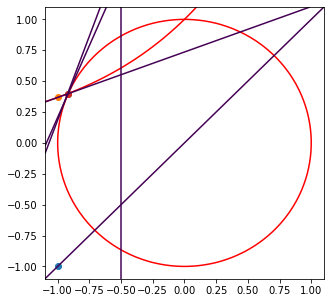

In [123]:
fig = plt.figure(figsize=(5,5))
x = np.linspace(-1.25,1.25,100)
y = np.linspace(-1.25,1.25,100)

X,Y = np.meshgrid(x,y)

G1 = X**2 + Y**2 -1
G2 = np.exp(X) - Y



lb1 = -1.1
ub1 = 1.1
lb2 = -1.1
ub2 = 1.1
p = 50

fig = plt.figure(figsize=(5,5))
x = np.linspace(lb1,ub1,p)
y = np.linspace(lb2,ub2,p)

X,Y = np.meshgrid(x,y)

G1 = X**2 + Y**2 -1
G2 = np.exp(X) - Y

Z = []

for constr in constraints:
    Z.append(plotter(X,Y,constr))
    
for i in range(len(Z)):
    plt.figure(figsize=(5,5))
    plt.contour(X,Y,G1,[0],colors='red')
    plt.contour(X,Y,G2,[0],colors='red')
    #plt.scatter(x_opt[0],x_opt[1])
    for j in range(i):
        plt.contour(X,Y,Z[j],[0])
        if i > 1:
            #if lb1 <= path_x[j-1] <= ub1 and lb2 <= path_y[j-1] <= ub2:
            if j < i-1:
                plt.scatter(path_x[j],path_y[j])
    plt.show()



In [126]:
#Second Test

#Test
c_test = np.array([-1,-1])

def g1(x):
    return x[0]**2 + x[1]**2 -1


K_test = [g1]

def grad_g1(x):
    return np.array([2*x[0], 2*x[1]])



K_grad_test = [grad_g1]

A_test = None

b_test = None

eps = 1e-1

bounds_test = ([0,1],[0,1])

res = Kelley(c_test,K_test,K_grad_test,A_test, b_test,bounds_test,eps)

x_opt = res[0]

print('x = ', res[0])
print('Numter of Iterations: ', res[1])

A = res[2]
b = res[3]

path_x = res[4][:,0]
path_y = res[4][:,1]


constraints = []

def make_constraint(i):
    
    def constraint(x):
        return A[i,:] @ x - b[i]
    return constraint

for i in range(b.shape[0]):
    constraint = make_constraint(i)
    
    constraints.append(constraint)

x =  [0.58333333 0.83333333]
Numter of Iterations:  4


<Figure size 360x360 with 0 Axes>

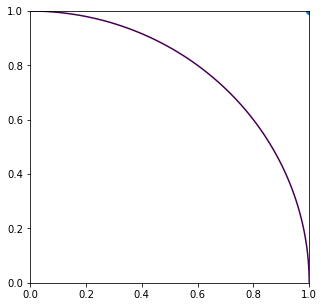

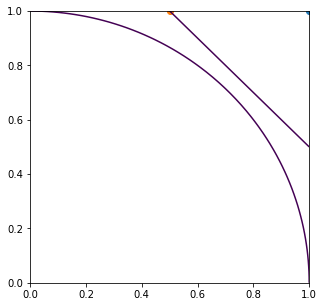

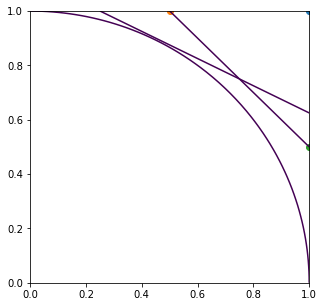

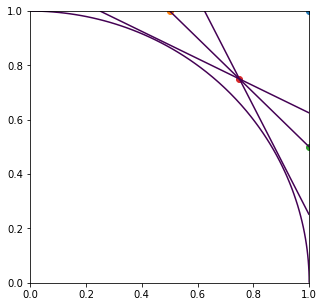

In [127]:
lb1 = 0
ub1 = 1
lb2 = 0
ub2 = 1
p = 50

fig = plt.figure(figsize=(5,5))
x = np.linspace(lb1,ub1,p)
y = np.linspace(lb2,ub2,p)

X,Y = np.meshgrid(x,y)

G1 = X**2 + Y**2 -1
#G2 = np.exp(X) - Y

Z = []

for constr in constraints:
    Z.append(plotter(X,Y,constr))
    
for i in range(len(Z)):
    plt.figure(figsize=(5,5))
    plt.contour(X,Y,G1,[0])
    #plt.contour(X,Y,G2,[0])
    #plt.scatter(x_opt[0],x_opt[1])
    if lb1 <= path_x[0] <= ub1 and lb2 <= path_y[0] <= ub2:
        plt.scatter(path_x[0],path_y[0])
    for j in range(i):
        plt.contour(X,Y,Z[j],[0])
        #if j > 0:
        if lb1 <= path_x[j+1] <= ub1 and lb2 <= path_y[j+1] <= ub2:
            plt.scatter(path_x[j+1],path_y[j+1])
    plt.show()